# Installing Dependicies 

In [1]:
!pip install tensorflow_text
!pip install tf-models-official
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


# Data Cleaning 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd

lookupDS= pd.read_excel("/content/gdrive/MyDrive/Source Trove.xlsx",header=2 ,sheet_name=['August 13th 2021', 'August 16th 2021 - Evening', 'August 17th 2021 - Evening ', 'August 18th 2021 - Evening', 'Sheet1', 'August 19th 2021 - Evening ', 'August 20st 2021 - Evening', 'August 20th 2021 - Morning', 'August 23rd - Morning', 'August 23rd 2021 - Evening ', 'August 24th 2021- Morning', 'August 24th 2021 - Evening  ', 'August 25th-Morning', 'August 25th 2021 - Evening  ', 'August 26th - Morning', 'August 26th 2021 - Evening  ', 'August 27th- Morning', 'August 27th 2021 - Evening', 'August 30th - Morning', 'August 30th 2021 - Evening ', 'August 31st- Morning', 'August 31st 2021 - Evening', 'September 1st-Morning', 'September 1st 2021 - Evening', 'September 2nd- Morning', 'September 2nd 2021 - Evening', 'September 3rd-Morning', 'September 3rd 2021 - Evening'])
mdf = pd.concat(lookupDS, axis=0, ignore_index=True)


In [4]:
mdf = mdf.drop_duplicates()
mdf = mdf[mdf["Practice Area"].notna()]
mdf["Practice Area"]=mdf["Practice Area"].str.lower()

In [6]:
mdf["Practice Area"].value_counts()


cross practice - federal general politics    594
biopharmaceutical                            469
cross practice - other canadian politics     268
covid-19                                     259
cross practice - ontario general politics    120
(lpc)- liberal party of canada               111
health general overview                       91
(cpc)- conservative party of canada           75
(ndp)- new democratic party of canada         66
cannabis                                      35
housing                                       27
foreign affairs                               27
mental health and addictions                  24
economy, finances, & taxes                    24
health systems strategy                       22
regulated health prof.                        18
dermatology                                   16
thrombosis                                    16
(gpc)- green party of canada                  16
indigenous relations                          15
seniors             

In [7]:
import re
party_mask = mdf["Practice Area"].str.contains("party",flags=re.IGNORECASE)
mdf["Practice Area"][party_mask] = "party related"

party_mask = mdf["Practice Area"].str.contains("cpc",flags=re.IGNORECASE)
mdf["Practice Area"][party_mask] = "party related"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
mdf.head()

,Title,Information type,Column1,Source,Story from Blacklock's?,Comments for writers,Practice Area,Practice Area 2 (optional),Practice Area 3 (optional),Practice Area 4 (optional),Story Written,Story Written (Yes/No),Source URL,What section of brief?,Text of story (or other notes copied/pasted),Story Written (In Progress / Yes),"Client (ex: Kevin Vuong, C3)"
0,Alison Macdonald wins Liberal Party Nomination...,Other,NaN,https://liberal.ca/your-liberal-candidates/,No,"Relevant to Kevin Voung Campaign, interested i...",party related,Cross Practice - Federal General Politics,NaN,NaN,Yes - Simran,NaN,NaN,NaN,NaN,NaN,NaN
1,Senior Liberal ministerial staffers start to t...,News Article,NaN,https://www.hilltimes.com/2021/08/10/senior-li...,No,Article supports the idea of election being ca...,party related,Cross Practice - Federal General Politics,NaN,NaN,In Progress - Graeden,NaN,NaN,NaN,NaN,NaN,NaN
2,Affordability anxiety continues as income and ...,Report,NaN,https://abacusdata.ca/affordability-anxiety-pe...,No,Worry about cost of living crosses the politic...,"economy, finances, & taxes",Labour & Employment,Cross Practice - Federal General Politics,NaN,Yes - Graeden,NaN,NaN,NaN,NaN,NaN,NaN
3,Kelly McParland: Expected snap election shows ...,News Article,NaN,https://nationalpost.com/opinion/kelly-mcparla...,No,Talks about intentions behind an election - th...,cross practice - federal general politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,New Democrat leader Jagmeet Singh yesterday pr...,News Article,NaN,https://www.blacklocks.ca/seeks-billions-in-ne...,Yes,NaN,party related,Cross Practice - Federal General Politics,NaN,NaN,In Progress - Graeden,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mdf["Practice Area"].value_counts(ascending=True)

us pharma policy                               1
biosimilars and biologics                      2
transit                                        3
privacy / security                             3
immigration                                    4
national defence                               4
digital health                                 4
infrastructure                                 4
education & training                           4
small business                                 5
energy & natural resources                     6
agriculture                                    6
families & youth                               9
public health                                 12
cross practice - higher education             12
labour & employment                           12
seniors                                       14
environment                                   14
indigenous relations                          15
dermatology                                   16
thrombosis          

In [10]:
mdf["Practice Area"].value_counts(ascending=True)<50
mdf = mdf.apply(lambda x: x.mask(x.map(x.value_counts())<50, 'other news') if x.name=='Practice Area' else x)

mdf["Practice Area"].value_counts(ascending=True)

health general overview                       91
cross practice - ontario general politics    120
covid-19                                     259
cross practice - other canadian politics     268
party related                                272
other news                                   343
biopharmaceutical                            469
cross practice - federal general politics    594
Name: Practice Area, dtype: int64

In [11]:
mdf = mdf.filter(['Title', 'Practice Area'])

In [12]:
mdf.to_json("Source Trove.json")

# Main Script

In [13]:
from DataLoader import Dataset
from Model import BERT
from utils import plot_confusion_matrix, export_csv_predictions

TrainGen = Dataset("Source Trove.json")
TestGen = Dataset("Source Trove.json", mode='test')
ValGen = Dataset("Source Trove.json", mode='val')

model = BERT(TrainGen.n_classes)
model.train(TrainGen, ValGen,TrainGen.class_weights())
model.save_model(save_path='model.h5')
model.load_model(model_path='model.h5')

Epoch 1/15
36/36 [==============================] - 31s 655ms/step - loss: 2.1861 - categorical_accuracy: 0.1952 - precision: 0.3418 - recall: 0.0160 - val_loss: 1.9043 - val_categorical_accuracy: 0.2790 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
36/36 [==============================] - 23s 629ms/step - loss: 1.7427 - categorical_accuracy: 0.3785 - precision: 0.7742 - recall: 0.0284 - val_loss: 1.5423 - val_categorical_accuracy: 0.4199 - val_precision: 0.8136 - val_recall: 0.1326
Epoch 3/15
36/36 [==============================] - 23s 639ms/step - loss: 1.4320 - categorical_accuracy: 0.4879 - precision: 0.7500 - recall: 0.1597 - val_loss: 1.4240 - val_categorical_accuracy: 0.4586 - val_precision: 0.6195 - val_recall: 0.1934
Epoch 4/15
36/36 [==============================] - 23s 637ms/step - loss: 1.1961 - categorical_accuracy: 0.5760 - precision: 0.7402 - recall: 0.2898 - val_loss: 1.3712 - val_categorical_accuracy: 0.4917 - val_precision: 0.6265 - val_recall: 0.2

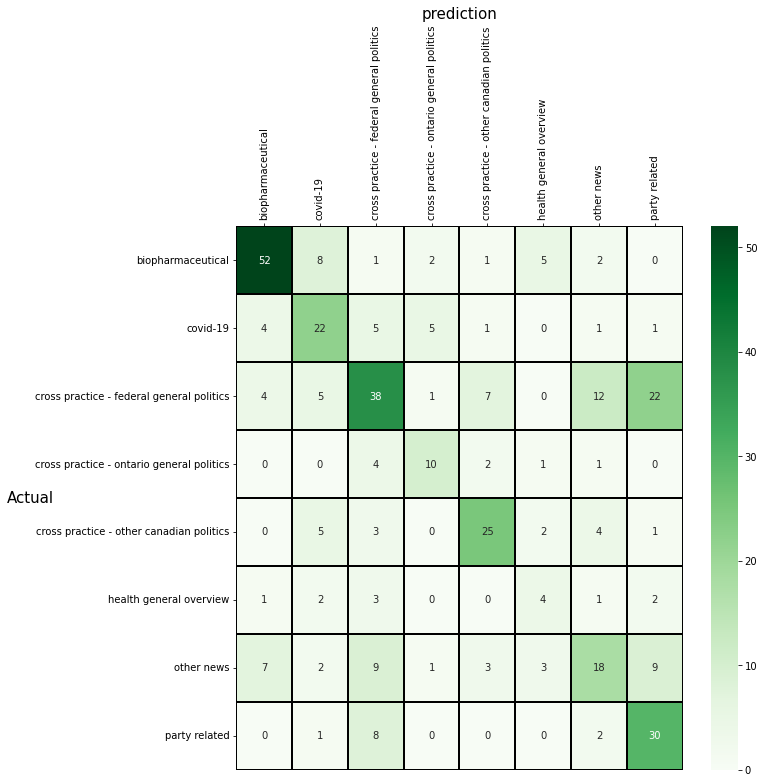

In [14]:
plot_confusion_matrix(TestGen, model)

In [15]:
export_csv_predictions(TestGen, model)